<font face="黑体" size=5>月度产销差漏损率分析报告图表</font> 

***author: 谢杰***<br/>

In [1]:
#调入常用包
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os
#查看当前目录
os.getcwd()

'C:\\Users\\XieJie\\mypyworks\\jupyter文件'

## 计划总体控制图

In [159]:

#读取excel位置
import xlrd
rb = xlrd.open_workbook(u'E:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx')
sheet = rb.sheet_by_index(0)
sheet.name

'月_总体控制'

In [160]:
def FloatOrNan(value):
    try:
        return float(value)
    except:
        return np.nan
yuefen = [str(x.value) for x in sheet.col(0)[2:14]]
gongsi_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(1)[2:14]]))
gongsi_shiji= list(map(FloatOrNan,[x.value for x in sheet.col(2)[2:14]]))
gongsi_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(3)[2:14]]))
gongsi_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(5)[2:14]]))

zhongqu_jihua = list( map(FloatOrNan,[x.value for x in sheet.col(11)[2:14]]))
zhongqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(12)[2:14]]))
zhongqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(14)[2:14]]))
zhongqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(13)[2:14]]))

dongqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(19)[2:14]]))
dongqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(20)[2:14]]))
dongqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(22)[2:14]]))
dongqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(21)[2:14]]))

nanqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(27)[2:14]]))
nanqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(28)[2:14]]))
nanqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(30)[2:14]]))
nanqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(29)[2:14]]))

beiqu_jihua =  list(map(FloatOrNan,[x.value for x in sheet.col(35)[2:14]]))
beiqu_shiji=  list(map(FloatOrNan,[x.value for x in sheet.col(36)[2:14]]))
beiqu_tongbi=  list(map(FloatOrNan,[x.value for x in sheet.col(38)[2:14]]))
beiqu_tongqi=  list(map(FloatOrNan,[x.value for x in sheet.col(37)[2:14]]))

## 公司产销差完成图

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

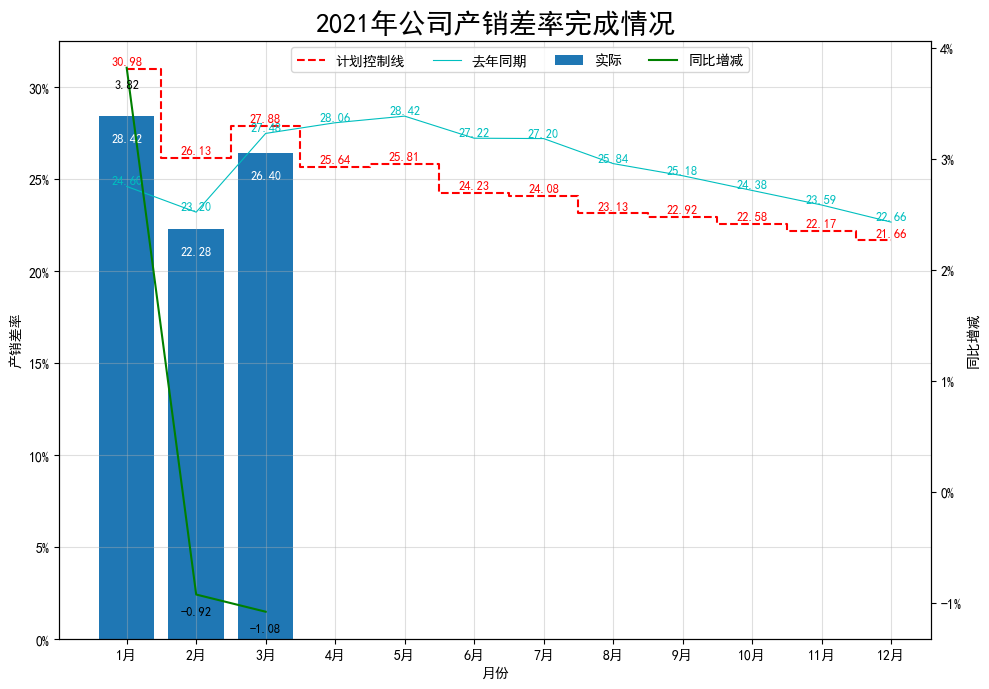

In [4]:

#ha水平对齐：right,center,left
#va垂直对齐：'top', 'bottom', 'center', 'baseline'
from matplotlib import ticker
fig,ax= plt.subplots(figsize=(10,7),dpi=100)
plt.grid(alpha=0.4)
plt.title('2021年公司产销差率完成情况',fontsize=20)
plt.step(x=yuefen, y=gongsi_jihua,where='mid',color='r',label='计划控制线',linestyle='dashed')
for x,y in zip(yuefen,gongsi_jihua):
 plt.text(x, y+0.001, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='r')

plt.bar(x=yuefen,height=gongsi_shiji,label='实际')
for x,y in zip(yuefen,gongsi_shiji):
 plt.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='w')

plt.plot(yuefen,gongsi_tongqi,label='去年同期',color='c', linewidth=0.8)
for x,y in zip(yuefen,gongsi_tongqi):
 plt.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'bottom',fontsize=9,color='c')

ax.set_xlabel("月份")
ax.set_ylabel("产销差率")
ax2 = ax.twinx()

ax2.plot(yuefen, gongsi_tongbi, color="g", label="同比增减")
for x,y in zip(yuefen,gongsi_tongbi):
 plt.text(x, y-0.001, '{:.2f}'.format(y*100), ha='center', va= 'top',fontsize=9,color='black')

ax2.set_ylabel("同比增减")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
fig.legend(loc="upper right", bbox_to_anchor=(0.8, 1), bbox_transform=ax.transAxes,ncol=4)
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\公司完成情况.svg')


## 各分公司产销差完成图

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12, 8),dpi=100,sharex=True)
ax1,ax2,ax3,ax4=axes.flatten()
ax1.set_title('中区')
ax1.step(x=yuefen, y=zhongqu_jihua,where='mid',color='r',label='计划控制线',linestyle='dashed')
for x,y in zip(yuefen,zhongqu_jihua):
 ax1.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax1.bar(x=yuefen,height=zhongqu_shiji,label='实际')
for x,y in zip(yuefen,zhongqu_shiji):
 ax1.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax1.plot(yuefen,zhongqu_tongqi,label='去年同期',color='c', linewidth=0.8)
ax1_2 = ax1.twinx()
ax1_2.plot(yuefen, zhongqu_tongbi, color="g", label="同比增减")
for x,y in zip(yuefen,zhongqu_tongbi):
 ax1_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax1_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax2.set_title('东区')
ax2.step(x=yuefen, y=dongqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,dongqu_jihua):
 ax2.text(x, y+0.001, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax2.bar(x=yuefen,height=dongqu_shiji)
for x,y in zip(yuefen,dongqu_shiji):
 ax2.text(x, y-0.01, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax2.plot(yuefen,dongqu_tongqi,color='c', linewidth=0.8)
ax2_2 = ax2.twinx()
ax2_2.plot(yuefen, dongqu_tongbi, color="g")
for x,y in zip(yuefen,dongqu_tongbi):
 ax2_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax2_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax3.set_title('南区')
ax3.step(x=yuefen, y=nanqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,nanqu_jihua):
 ax3.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax3.bar(x=yuefen,height=nanqu_shiji)
for x,y in zip(yuefen,nanqu_shiji):
 ax3.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax3.plot(yuefen,nanqu_tongqi,color='c', linewidth=0.8)
ax3_2 = ax3.twinx()
ax3_2.plot(yuefen, nanqu_tongbi, color="g")
for x,y in zip(yuefen,nanqu_tongbi):
 ax3_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax3_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

ax4.set_title('北区')
ax4.step(x=yuefen, y=beiqu_jihua,where='mid',color='r',linestyle='dashed')
for x,y in zip(yuefen,beiqu_jihua):
 ax4.text(x, y+0.003, '{:.2f}'.format(y*100), ha='center', va= 'bottom',color='r',fontsize=9)
ax4.bar(x=yuefen,height=beiqu_shiji)
for x,y in zip(yuefen,beiqu_shiji):
 ax4.text(x, y-0.015, '{:.2f}'.format(y*100), ha='center', va= 'top',color='w',fontsize=9)
ax4.plot(yuefen,beiqu_tongqi,color='c', linewidth=0.8)
ax4_2 = ax4.twinx()
ax4_2.plot(yuefen, beiqu_tongbi, color="g")
for x,y in zip(yuefen,beiqu_tongbi):
 ax4_2.text(x, y, '{:.2f}'.format(y*100), ha='center', va= 'top',color='black',fontsize=9)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax4_2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
fig.text(0.5, 0, '月份', ha='center')
fig.text(0, 0.5, '产销差率完成情况', va='center', rotation='vertical')
fig.legend(loc="upper center",ncol=4, bbox_to_anchor=(0.5, 1.02))
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\完成情况.svg')
#plt.savefig(r'c:\Users\XieJie\Desktop\完成情况.png',dpi=500,bbox_inches ='tight')


In [161]:
#设置计划
#3月份计划
a1=np.array([[x,y,z]  for x in ['中区','东区','南区','北区'] for y in ['计划','实际','同期']  for z in yuefen])
a2=np.array(zhongqu_jihua+zhongqu_shiji+zhongqu_tongqi+dongqu_jihua+dongqu_shiji+dongqu_tongqi+nanqu_jihua+nanqu_shiji+nanqu_tongqi+ beiqu_jihua+beiqu_shiji+beiqu_tongqi).reshape(-1,1)
data_melt = pd.concat([pd.DataFrame(a1,columns=['分公司','指标','月份']),pd.DataFrame(a2,columns=['数值'])],axis=1)

In [162]:
zhonglist=[data_melt.query("月份=='3月'&指标=='实际'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='计划'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='中区'").iloc[0,3]]
donglist=[data_melt.query("月份=='3月'&指标=='实际'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='计划'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='东区'").iloc[0,3]]
nanlist=[data_melt.query("月份=='3月'&指标=='实际'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='计划'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='南区'").iloc[0,3]]
beilist=[data_melt.query("月份=='3月'&指标=='实际'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='计划'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='北区'").iloc[0,3]]

zhongcol = str(np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='中区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='计划'&分公司=='中区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='中区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='同期'&分公司=='中区'").iloc[0,3],'y','r')))
dongcol = str(np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='东区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='计划'&分公司=='东区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='东区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='同期'&分公司=='东区'").iloc[0,3],'y','r')))
nancol = str(np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='南区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='计划'&分公司=='南区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='南区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='同期'&分公司=='南区'").iloc[0,3],'y','r')))
beicol = str(np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='北区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='计划'&分公司=='北区'").iloc[0,3],'g',
               np.where(np.array(data_melt.query("月份=='3月'&指标=='实际'&分公司=='北区'").iloc[0,3])<data_melt.query("月份=='3月'&指标=='同期'&分公司=='北区'").iloc[0,3],'y','r')))

Text(0.5, 0.98, '分公司累计本月激励奖励区间')

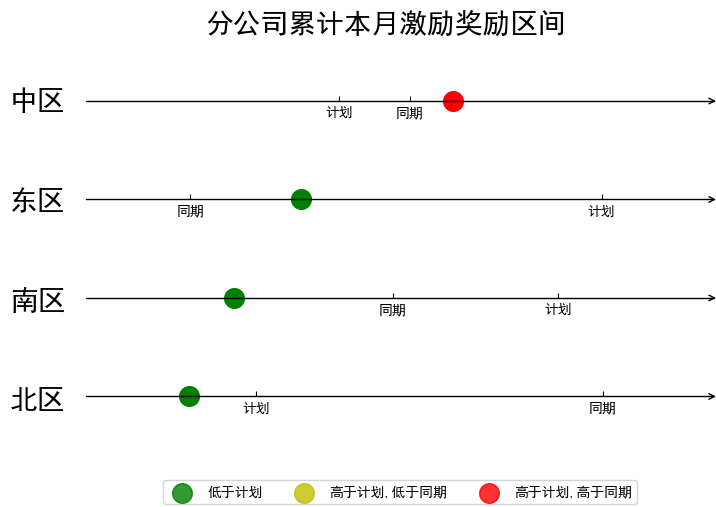

In [182]:
#fig,ax= plt.subplots(figsize=(7,0.2),dpi=100)
import mpl_toolkits.axisartist as axisartist
fig = plt.figure(figsize=(8,5),dpi=100)

ax1 = axisartist.Subplot(fig, 411) 
fig.add_axes(ax1)
ax1.axis[:].set_visible(False)
ax1.axis["x"] = ax1.new_floating_axis(0,0)
ax1.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax1.scatter(x=data_melt.query("月份=='3月'&指标=='实际'&分公司=='中区'").iloc[0,3],y=0,s=200,c=zhongcol)
ax1.set(xticks=[data_melt.query("月份=='3月'&指标=='计划'&分公司=='中区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='中区'").iloc[0,3]],
      xticklabels=['计划','同期'],       
     
     xlim=[min(zhonglist)-0.01,max(zhonglist)+0.01] )
fig.text(0.03,0.78,'中区',fontsize=20)

ax2 = axisartist.Subplot(fig, 412) 
fig.add_axes(ax2)
ax2.axis[:].set_visible(False)
ax2.axis["x"] = ax2.new_floating_axis(0,0)
ax2.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax2.scatter(x=data_melt.query("月份=='3月'&指标=='实际'&分公司=='东区'").iloc[0,3],y=0,s=200,c=dongcol)
ax2.set(xticks=[data_melt.query("月份=='3月'&指标=='计划'&分公司=='东区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='东区'").iloc[0,3]],
      xticklabels=['计划','同期'],
      xlim=[min(donglist)-0.01,max(donglist)+0.01]
        )
fig.text(0.03,0.58,'东区',fontsize=20)

ax3 = axisartist.Subplot(fig, 413) 
fig.add_axes(ax3)
ax3.axis[:].set_visible(False)
ax3.axis["x"] = ax3.new_floating_axis(0,0)
ax3.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax3.scatter(x=data_melt.query("月份=='3月'&指标=='实际'&分公司=='南区'").iloc[0,3],y=0,s=200,c=nancol)
ax3.set(xticks=[data_melt.query("月份=='3月'&指标=='计划'&分公司=='南区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='南区'").iloc[0,3]],
      xticklabels=['计划','同期'],
        xlim=[min(nanlist)-0.01,max(nanlist)+0.01]
       )
fig.text(0.03,0.38,'南区',fontsize=20)

ax4 = axisartist.Subplot(fig, 414) 
fig.add_axes(ax4)
ax4.axis[:].set_visible(False)
ax4.axis["x"] = ax4.new_floating_axis(0,0)
ax4.axis["x"].set_axisline_style("->", size = 1.0)
#ax1.axis["x"].set_axis_direction("top")
ax4.scatter(x=data_melt.query("月份=='3月'&指标=='实际'&分公司=='北区'").iloc[0,3],y=0,s=200,c=beicol)
ax4.set(xticks=[data_melt.query("月份=='3月'&指标=='计划'&分公司=='北区'").iloc[0,3],data_melt.query("月份=='3月'&指标=='同期'&分公司=='北区'").iloc[0,3]],
      xticklabels=['计划','同期'],
      xlim=[min(beilist)-0.01,max(beilist)+0.01]
       )
fig.text(0.03,0.18,'北区',fontsize=20)
for col,explain in zip(['g', 'y', 'r'],['低于计划', '高于计划,低于同期','高于计划,高于同期']):
    ax1.scatter([], [], c=col, alpha=0.8,s=200,
                label=explain)
fig.legend(loc="center", bbox_to_anchor=(0.5,0.03),ncol=3,labelspacing=3)
#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
fig.suptitle("分公司累计本月激励奖励区间",fontsize=20)
#fig.tight_layout()

### 片区激励图

In [180]:
#读取excel位置
import xlrd
rb = xlrd.open_workbook(u'E:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx')
sheet = rb.sheet_by_index(1)

def FloatOrNan(value):
    try:
        return float(value)
    except:
        return np.nan

pianqu = [x.value for x in sheet.col(2)[35:41]]
shiji = [float(x.value) for x in sheet.col(7)[35:41]]
jihua = [float(x.value/100) for x in sheet.col(9)[35:41]]
tongqi = [float(x.value) for x in sheet.col(10)[35:41]]
col=[]
for i in range(6):
    col.append(str(np.where(shiji[i]<jihua[i],'g',np.where(shiji[i]<tongqi[i],'y','r'))))

#gongsi_shiji= list(map(FloatOrNan,[x.value for x in sheet.col(2)[2:14]]))


Text(0.5, 0.98, '片区累计本月激励区间')

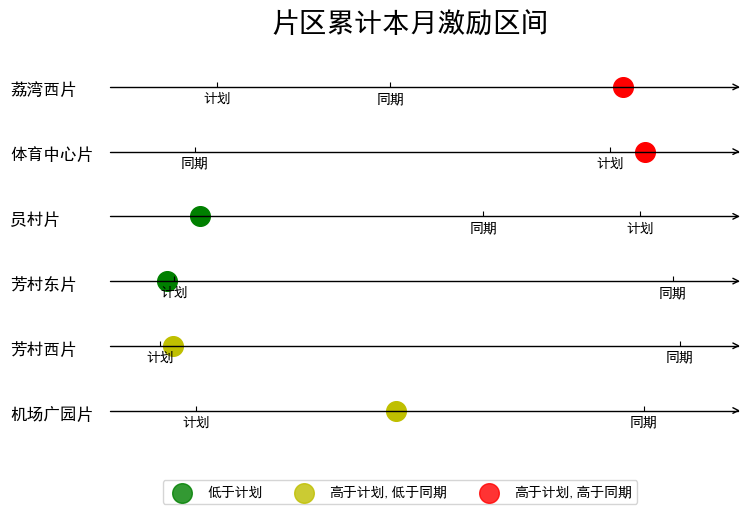

In [181]:
import mpl_toolkits.axisartist as axisartist
fig = plt.figure(figsize=(8,5),dpi=100)

ax1 = axisartist.Subplot(fig, 611) 
ax2 = axisartist.Subplot(fig, 612)
ax3 = axisartist.Subplot(fig, 613)
ax4 = axisartist.Subplot(fig, 614)
ax5 = axisartist.Subplot(fig, 615)
ax6 = axisartist.Subplot(fig, 616)

axes = [ax1,ax2,ax3,ax4,ax5,ax6]

for a,i in zip(axes,range(6)):
    fig.add_axes(a)
    fig.text(0,0.81-0.13*i,pianqu[i],fontsize=12)
    a.axis[:].set_visible(False)
    a.axis["x"] = a.new_floating_axis(0,0)
    a.axis["x"].set_axisline_style("->", size = 1.0),    
    a.scatter(x=shiji[i],y=0,s=200,c=col[i])    
    a.set(xticks=[jihua[i],tongqi[i]],
      xticklabels=['计划','同期'],      
      xlim=[min(shiji[i],jihua[i],tongqi[i])-0.01,max(shiji[i],jihua[i],tongqi[i])+0.01])
    
for col,explain in zip(['g', 'y', 'r'],['低于计划', '高于计划,低于同期','高于计划,高于同期']):
    ax1.scatter([], [], c=col, alpha=0.8,s=200,
                label=explain)
fig.legend(loc="center", bbox_to_anchor=(0.5,0.03),ncol=3,labelspacing=3)

fig.suptitle("片区累计本月激励区间",fontsize=20)


In [ ]:
import pyecharts
print(pyecharts.__version__)
#水量平衡表旭日图
from pyecharts.charts import Sunburst
from pyecharts import options as opts

In [ ]:
data = [
    opts.SunburstItem(
        name="注册用水量",                                #第1层级
        children=[
            opts.SunburstItem(                       #1.1层级
                name="计费用水",                
                children=[
                    opts.SunburstItem(name="计量用水", value=1187494203),#1.1.1层级
                    opts.SunburstItem(name="未计量用水",value=53351685)
                    
                ],
            ),
            opts.SunburstItem(
                name="免费用水", #1.2层级               
                children=[
                    opts.SunburstItem(name="计量", value=0),
                    opts.SunburstItem(name="未计量", value=118913235),
                ],
            ),
        ],
    ),
    opts.SunburstItem(
        name="漏损水量",                                                  #第2层级
        children=[
            opts.SunburstItem(
                name="漏失",
                children=[
                    opts.SunburstItem(name="明漏", value=0),
                    opts.SunburstItem(name="暗漏", 
                                     children=[
                                        opts.SunburstItem(name="主动检出暗漏点", value=0),#1.1.1层级
                                        opts.SunburstItem(name="其它",value=174714223.66)
                                     ]                    
                                     ),
                    opts.SunburstItem(name="水箱、水池的\n渗漏和溢流", value=0),
                ],
            ),
            opts.SunburstItem(
                name="计量",
                children=[
                    opts.SunburstItem(name="总分表差", value=43661780),
                    opts.SunburstItem(name="表具误差", value=8504039.48),
                ],
            ),
            opts.SunburstItem(
                name="其他",
                children=[                    
                    opts.SunburstItem(name="未注册用户和用户拒查", value=17681498.86),
                ],
            )
        ],
    ),
]
sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
)
sunburst.render_notebook()

In [ ]:
data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203, "percent":35},
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水", "itemStyle": {"color": "#794752"},             
                "children": [                    
                    {"name": "计量", "value": 0,"itemStyle": {"color": "#794752"}, },
                    {"name": "未计量", "value": 118913235,"itemStyle": {"color": "#794752"},},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="600px", height="600px",bg_color='white'))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图",pos_left='left',),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
    
)
sunburst.render_notebook()

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType
danwei=['荔湾西片(中区)','体育中心片(东区)','员村片(东区)','芳村东片(南区)','芳村西片(南区)','机场广园片(北区)']
jihua=[36.53,18.40,17.74,40.41,39.15,28.89]
wancheng=[31.99,18.01,18.06,39.27,40.37,32.45]
tongqi = [34.53,17.80,18.71,38.66,34.93,26.33]
c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="600px",bg_color='white'))#theme=ThemeType.white,
    .add_xaxis(danwei)
    .add_yaxis("计划",jihua,
               itemstyle_opts=opts.ItemStyleOpts(color='#339999'),
              label_opts=opts.LabelOpts(position='inside'))
    .add_yaxis("完成",wancheng,
               itemstyle_opts=opts.ItemStyleOpts(color='#339933'),
               label_opts=opts.LabelOpts(position='inside',color='#333333'),               
               stack="stack1")#
    .add_yaxis("同期",[-x for x in tongqi],itemstyle_opts=opts.ItemStyleOpts(color='#FF9900'),stack="stack1",
               label_opts=opts.LabelOpts(formatter=JsCode(
                                            """function(params) {
                                             return Math.abs(params.data).toFixed(2);
                                            }
                                        """ ),
                                         position='left',color='#333333'
                                              )) 
    .set_global_opts(toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    xaxis_opts=opts.AxisOpts(type_='value',interval=10,
                                             splitline_opts=opts.SplitLineOpts(is_show=True),axislabel_opts=opts.LabelOpts(formatter=JsCode(
                    """function(params){
                    return Math.abs(params);
                    }                    
                    """ ))),
                     yaxis_opts=opts.AxisOpts(type_='category',axistick_opts=opts.AxisTickOpts(is_show=False))
                    )
    .reversal_axis()
)
c.render_notebook()

In [ ]:
zone2 = pd.read_excel(r'e:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=2)
zone2=zone2[np.isfinite(zone2['综合产销差'])==1].sort_values('综合产销差',ascending=True)

In [ ]:
zone2

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
"""
y = []
for idx, item in enumerate(x):
    if idx <= xlen / 2:
        y.append(
            opts.BarItem(
                name=item,
                value=(idx + 1) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#749f83"),
            )
        )
    else:
        y.append(
            opts.BarItem(
                name=item,
                value=(xlen + 1 - idx) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#d48265"),
            )
        )
"""


x=list(zone2['编号'])
y=[dict(value=x,itemStyle=dict(color=y)) for x,y in zip(zone2['综合产销差'],zone2['分公司颜色'])]
c = (
    Bar(init_opts=opts.InitOpts(width="800px", height="600px",bg_color='white'))
    .add_xaxis(x)
    .add_yaxis("",y,               
              #markpoint_opts=opts.MarkPointOpts(data=[
                  #opts.MarkPointItem(name="重点片区", coord=['荔湾西片',y[x.index('荔湾西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['体育中心片',y[x.index('体育中心片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['员村片',y[x.index('员村片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村东片',y[x.index('芳村东片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村西片',y[x.index('芳村西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['机场广园片',y[x.index('机场广园片')]['value'] ], value='重'),]),
              )  
    .reversal_axis()
    .set_global_opts(title_opts=opts.TitleOpts(title="累计2月二级分区产销差排名",pos_left='center',),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                            """function(params) {
                                             return params.data.value.toFixed(2) 
                                            }
                                        """ ),
                                               position="right",
                                               color="black",
                                              ),
                    )
)
    

c.render_notebook()

In [ ]:
#分公司分布图
zone3 = pd.read_excel(r'e:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=6)
zone3 = zone3.query("月份 in ['2月','3月']") 
zone3

In [ ]:
#f, axes = plt.subplots(2,2, figsize=(6, 4),sharex=True)
#sns.kdeplot(data=zone3 , x="累计产销差率", hue="月份",ax=axes[0,1])#类别画图函数可以分面。专项绘图函数不行。
#sns.despine(left=True) #移除边框

fig=plt.figure(figsize=(8,6),dpi=100)
#fig.suptitle("我是画布的标题",fontsize=20)
g=sns.histplot(data=zone3 , x="累计产销差率", bins=[-20,-10,0,10,20,30,40,50],hue="月份",multiple='dodge',shrink=.8,kde=True)
sns.despine() #移除边框
plt.xticks([-16,-6,4,14,24,34,44],labels=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上'])
plt.ylabel('二级分区数量')
plt.xlabel('累计产销差率（%）')
#plt.title('测试')
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",kind="kde",height=5,aspect=1.5)#必须用细项函数才可以写到axes里面,一个图不加ax索引，单行列图只加一个索引。
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.legend.set_title("")


In [ ]:
#g = sns.FacetGrid(zone3,col="分公司",hue="月份", height=10)
#g.map(sns.kdeplot, "累计产销差率")
#g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",col="分公司" ,kind="kde",col_wrap=2)
#g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.set(ylabel='二级分区集中度')

f, axes = plt.subplots(2,2, figsize=(12, 10),dpi=100)
ax1,ax2,ax3,ax4=axes.flatten()
bins=[-20,-10,0,10,20,30,40,50]
xticks=[-16,-6,4,14,24,34,44]
xlabel=['-10以下','-10~0','0~10','10~20','20~30','30~40','40以上']

sns.histplot(data=zone3.query("分公司 == '中区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabel)
ax1.set_xlabel('')
ax1.set_ylabel('二级分区数量')
ax1.set_title('中区')

sns.histplot(data=zone3.query("分公司 == '东区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax2)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabel)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('东区')

sns.histplot(data=zone3.query("分公司 == '南区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax3)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xlabel)
ax3.set_xlabel('累计产销差（%）')
ax3.set_ylabel('二级分区数量')
ax3.set_title('南区')

sns.histplot(data=zone3.query("分公司 == '北区'") , x="累计产销差率", bins=bins,
             hue="月份",multiple='dodge',shrink=.8,kde=True,ax=ax4)
ax4.set_xticks(xticks)
ax4.set_xticklabels(xlabel)
ax4.set_xlabel('累计产销差（%）')
ax4.set_ylabel('')
ax4.set_title('北区')

sns.despine() #移除边框
f.tight_layout()

In [ ]:
#中东南北贡献度饼图
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

recipe = ["0.17 百分点 中区",
          "1.06 百分点 东区",
          "0.21 百分点 南区",
          "1.04 百分点 北区"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [ ]:
#完成售水计划比例图
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
Sys.setlocale('LC_ALL', locale = "English_United States.1252") #字符编码由GBk改成utf-8
library(ggplot2) 
library(reshape2)

data <- read.csv(file="C://Users//Jay//mypyworks//dumbbell.csv",header = T,check.names=F)


# 注释：将原始的宽数据变成长数据，方便画图
data_melt <- melt(data,id.vars = "gene")


%%R 
order <- c("gene1","gene2","gene3","gene4","gene5","gene6","gene7","gene8","gene9","gene10")
order <- rev(order)
p <- ggplot(data_melt,aes(x=value , y= gene)) +  
  geom_line(aes(group = gene)) +
  geom_point(aes(fill=variable), shape = 21, size = 9) +
  scale_y_discrete(limits = order)
p

In [ ]:
%R -o data_melt